In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
adult=pd.read_csv('Datasets/adult.data', header=None)

In [80]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
adult.shape

(32561, 15)

In [82]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [83]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
        'race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
adult.columns=columns

In [84]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [85]:
adult['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [86]:
def missing_values(df):
    df.replace(' ?', np.NAN, inplace=True)
    missing_val=df.isnull().sum()
    missing_val_percent=100*missing_val/len(df)
    missing_val_table=pd.concat([missing_val,missing_val_percent], axis=1)
    missing_val_table=missing_val_table.rename(columns={0:'Missing Value',1:'Missing_%'})
    missing_val_table=missing_val_table[missing_val_table.iloc[:,1]!=0].sort_values('Missing_%', ascending=False)
    return missing_val_table

In [87]:
missing_values(adult)

,Missing Value,Missing_%
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486


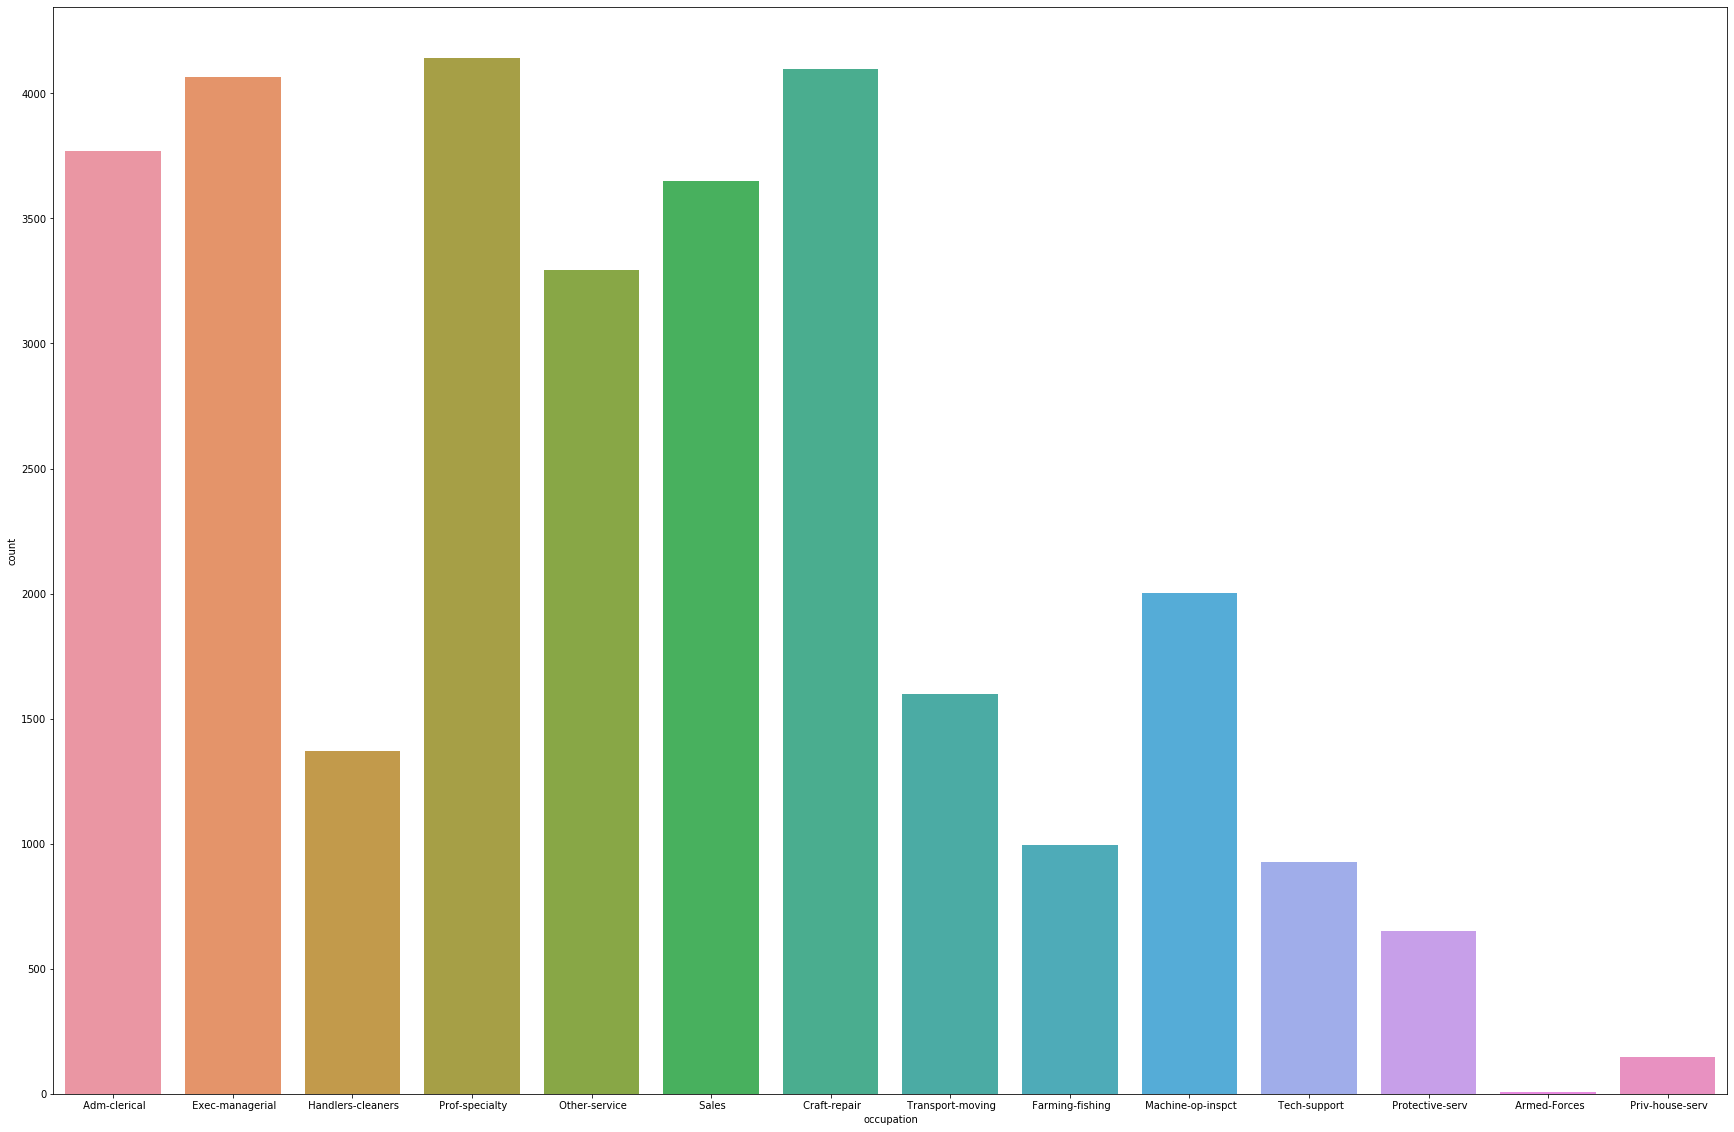

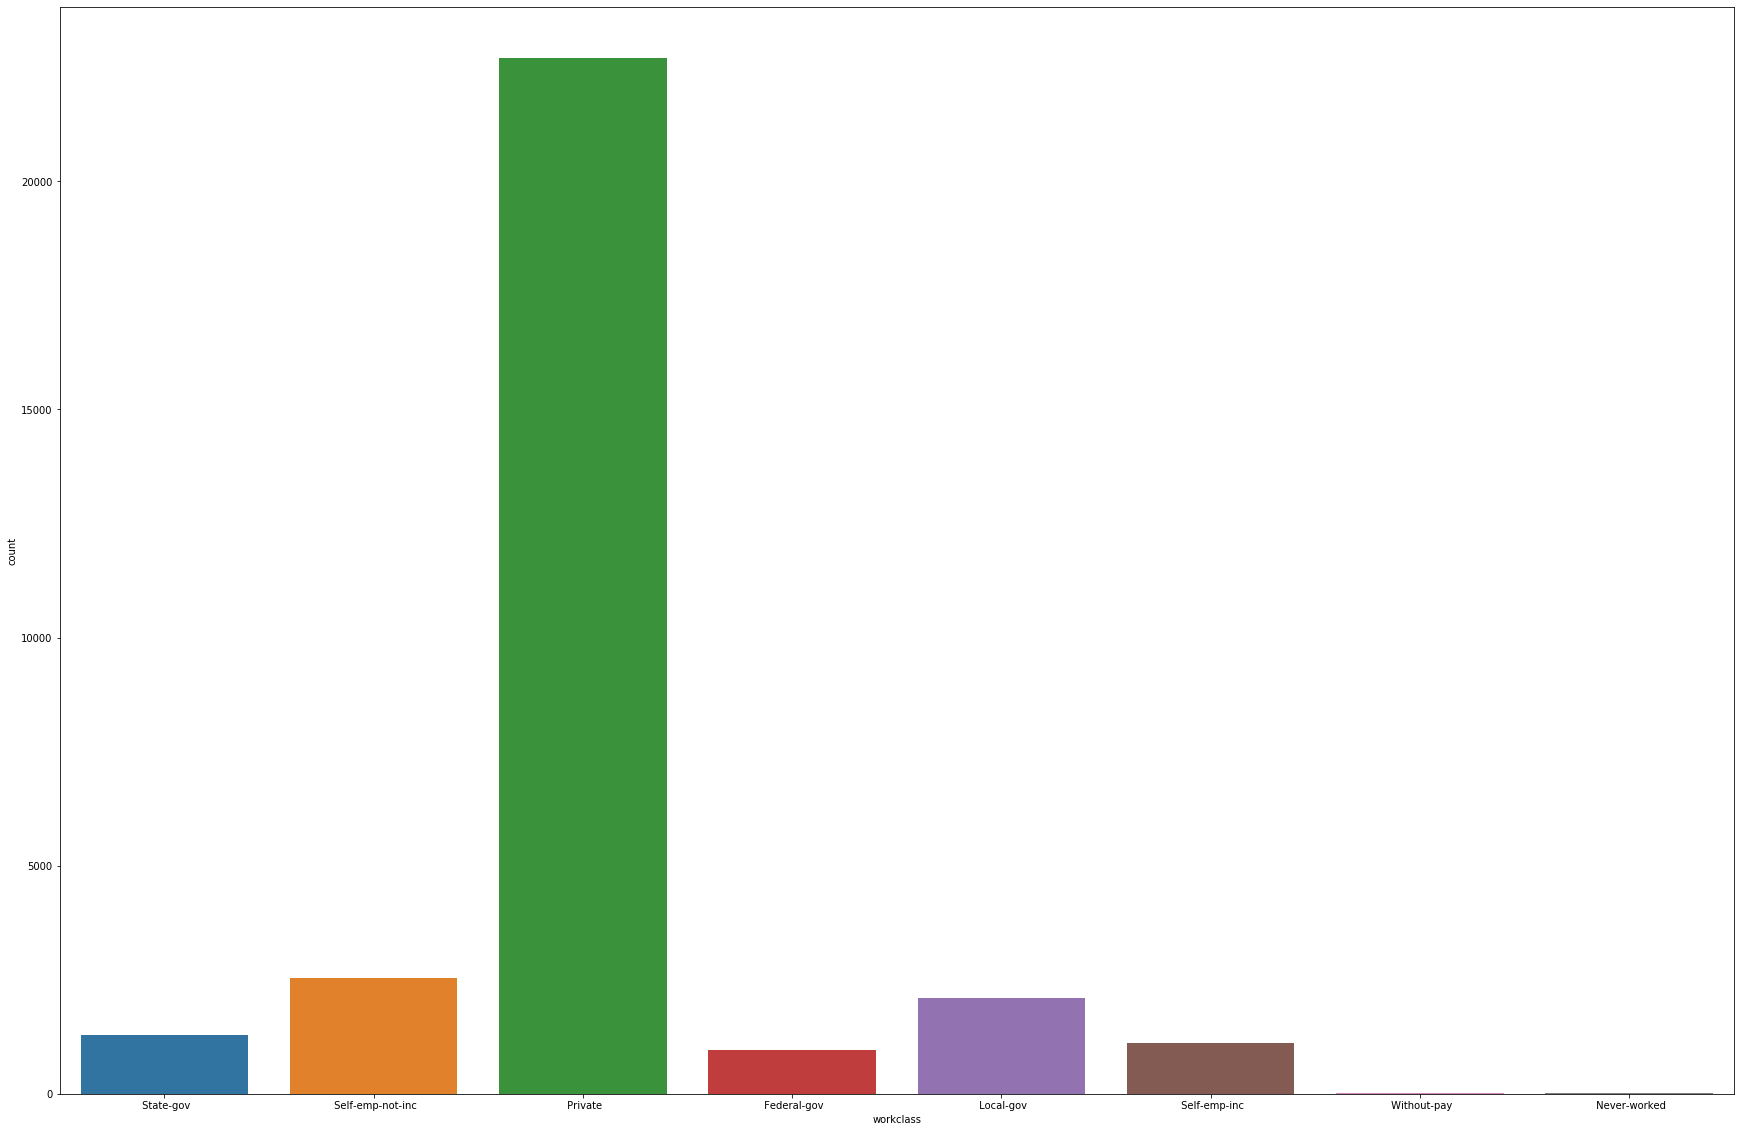

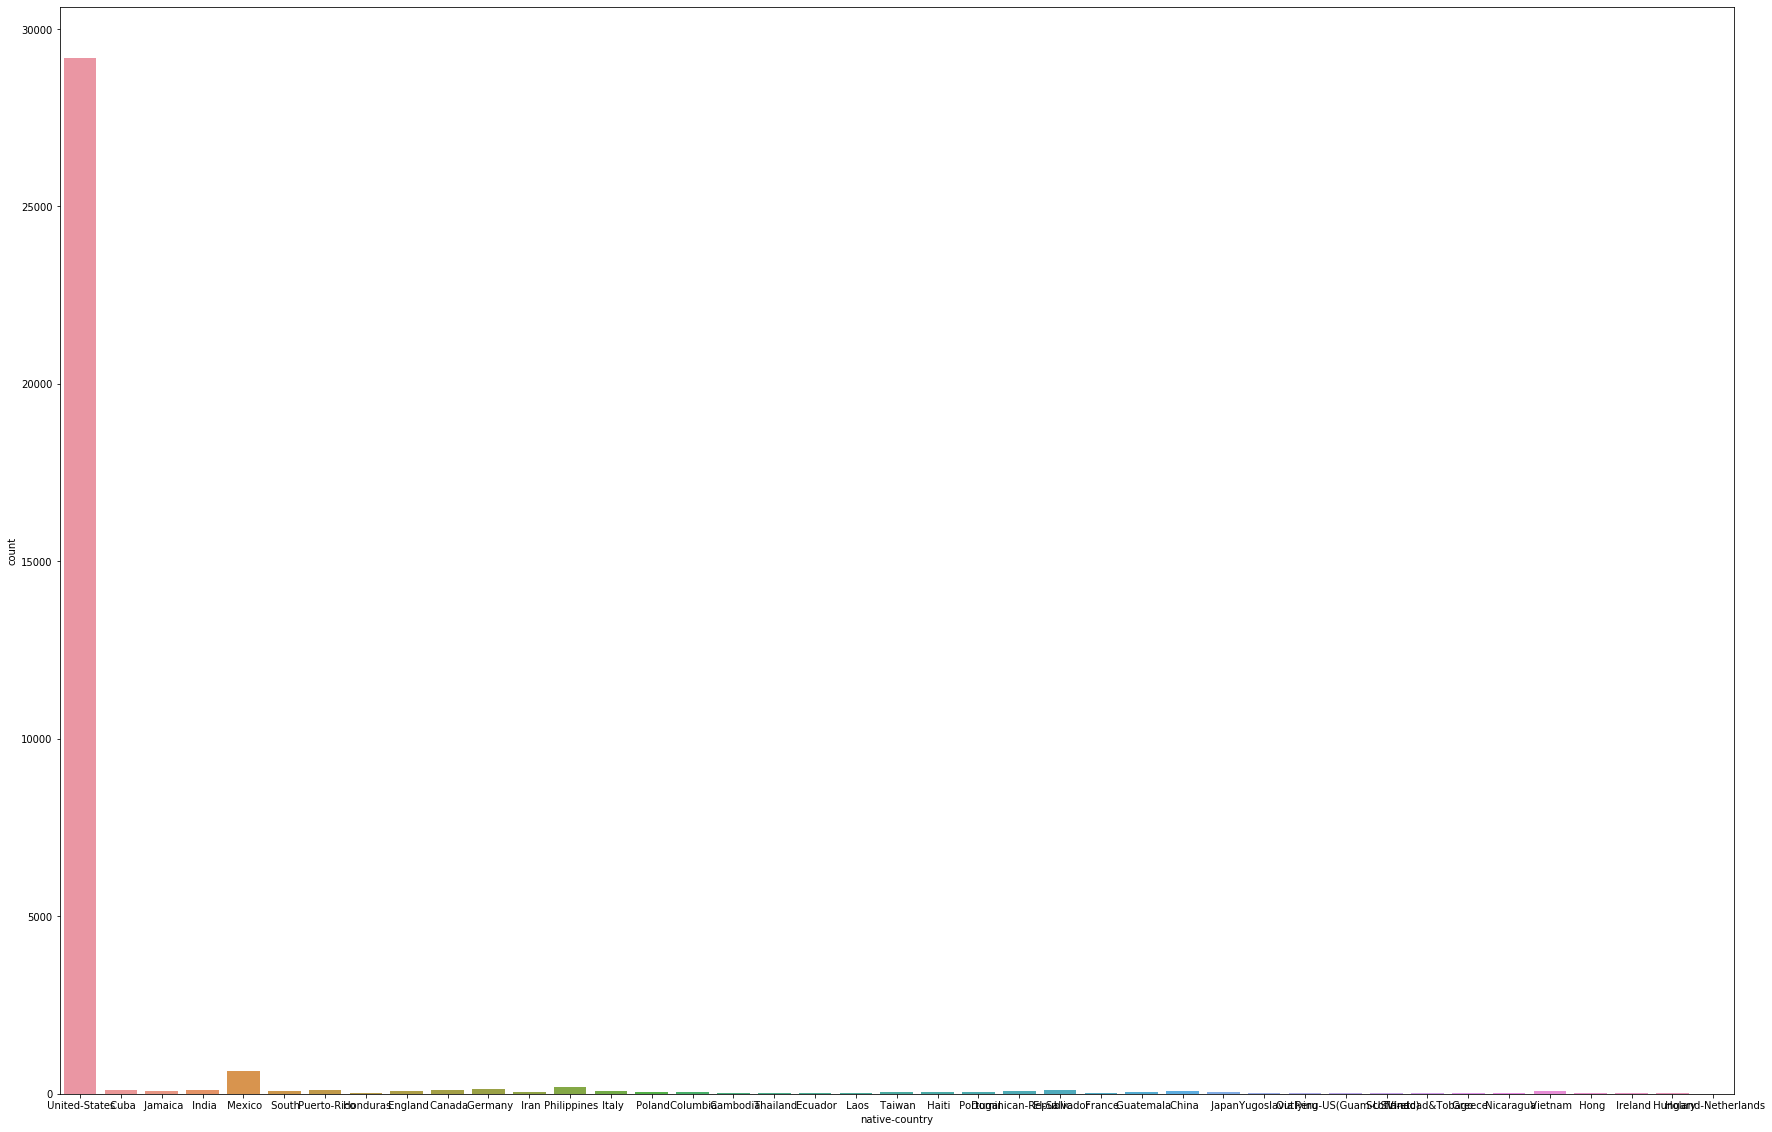

In [88]:
cols=['occupation', 'workclass','native-country']
for i in cols:
    plt.figure(figsize=(30,20))
    sns.countplot(adult[i])

From the graph we can see that prof-speciality is the most common occupation, so we will fill the missing values of occupation colum  with it.
For workclass, it is private and for native-country the most common value is united-States

In [89]:
adult['occupation'].fillna('Prof-speciality', inplace=True)
adult['workclass'].fillna('Private', inplace=True)
adult['native-country'].fillna('United-States', inplace=True)

In [90]:
for col in cols:
    print(adult[col].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Prof-speciality       1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 United-States                 29170
 Mexico                          643
United-States                    583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                    

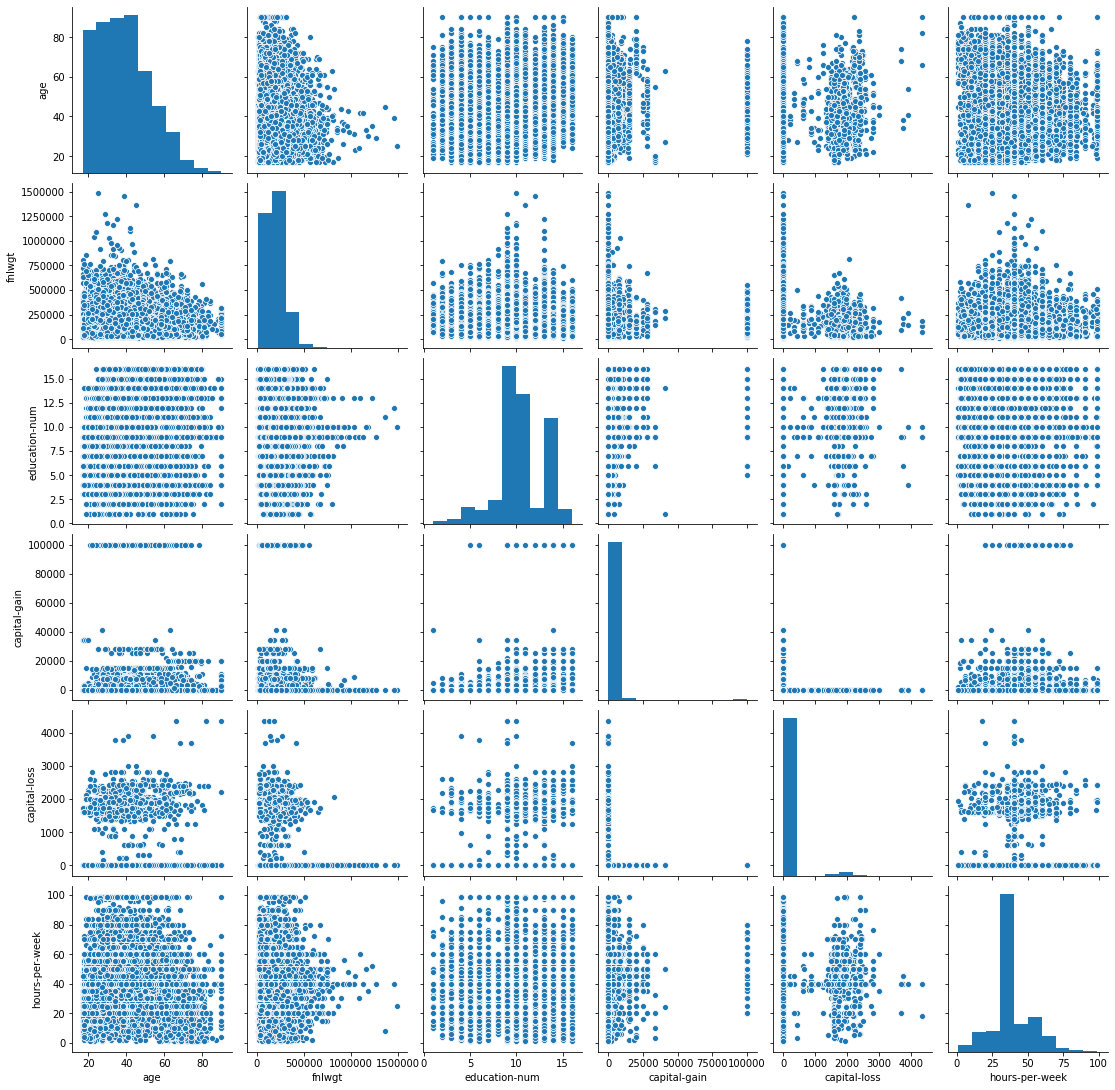

In [91]:
sns.pairplot(adult)

In [92]:
# Bivariate analysis
def visualize_bivariate_graphs():
    cat_cols=['workclass','education','marital-status','occupation','relationship',
        'race','sex','native-country']
    target='target'

    for col in cat_cols:
        pd.crosstab(adult[col],adult[target]).plot(kind='bar')
        plt.title('Income vs {}'.format(col))
        plt.ylabel('Income')
    

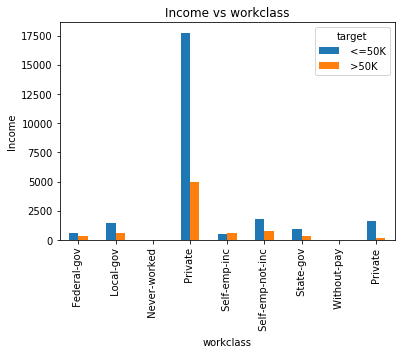

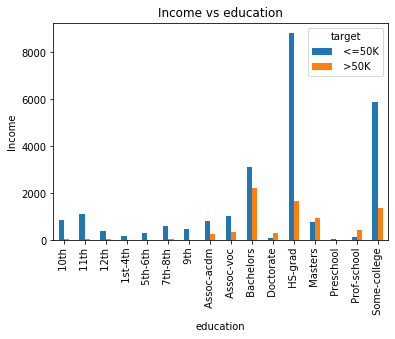

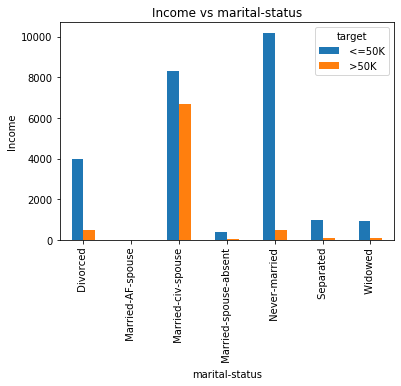

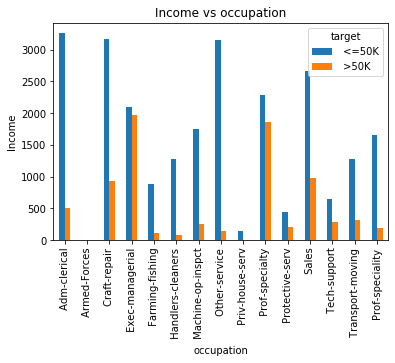

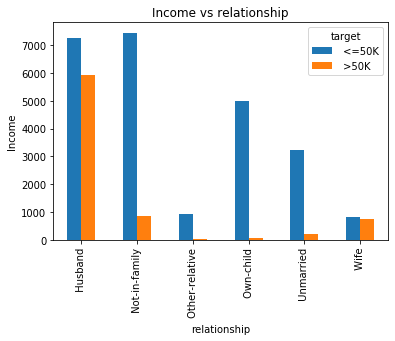

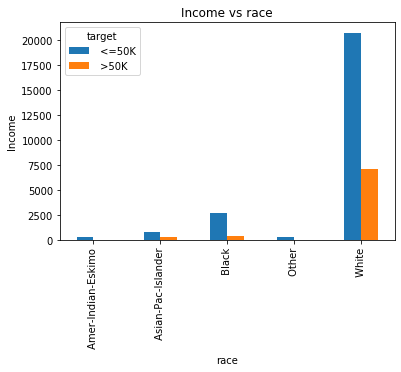

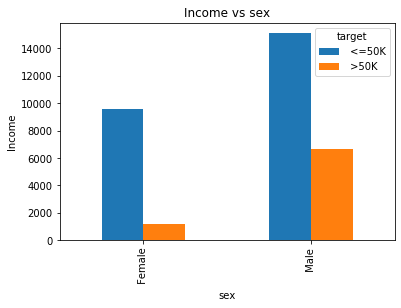

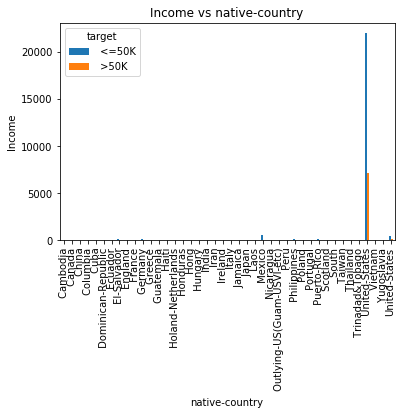

In [93]:
visualize_bivariate_graphs()

From the bivariate analysis of the categorical variables, we earning is higher in case of the following:
1. workclass-private
2. education-bachelors
3. marital-status-married_spouse
4. occupation-exec-manegerial
5. relationship-husband
6. race-white
7. sex-male
8. country-United-States


Again for the categorical columns that do not have much variations between some ot its attributes, can be modified by clubbing those attributes togather, in order to reduce the total number of attributes.


In [94]:
# Feature engg
adult['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
United-States                    583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [95]:
adult['workclass'].str.strip().replace(['Federal-gov','State-gov','Local-gov'],'gov', inplace=True)


In [96]:
for i in range(len(adult['workclass'])):
    if adult.at[i,'workclass'].strip() in ['Federal-gov','State-gov','Local-gov']:
        adult.at[i,'workclass']='gov'
    if adult.at[i,'workclass'].strip() in ['Self-emp-not-inc','Self-emp-inc']:
        adult.at[i,'workclass']='selfemp'

In [97]:
for i in range(len(adult['education'])):
    if adult.at[i,'education'].strip() in ['Assoc-voc','Assoc-acdm']:
        adult.at[i,'education']='Assoc'
    if adult.at[i,'education'].strip() in ['Prof-school','Doctorate']:
        adult.at[i,'education']='Doctorate'
    if adult.at[i,'education'].strip() in ['10th','11th']:
        adult.at[i,'education']='10th'
    if adult.at[i,'education'].strip() in ['1st-4th','5th-6th','7th-8th','9th']:
        adult.at[i,'education']='loweducated'
    

In [98]:
for i in range(len(adult['marital-status'])):
    if adult.at[i,'marital-status'].strip() in ['Separated','Widowed']:
        adult.at[i,'marital-status']='Single'
    

In [99]:
for i in range(len(adult['native-country'])):
    if adult.at[i,'native-country'].strip() in ['United-States']:
        adult.at[i,'native-country']='United-States'
    if adult.at[i,'native-country'].strip() in ['El-Salvador','Guatemala','Nicaragua','Honduras']:
        adult.at[i,'native-country']='Central-America'
    if adult.at[i,'native-country'].strip() in ['Columbia','Ecuador','Peru','Trinadad&Tobago']:
        adult.at[i,'native-country']='South-America'
    if adult.at[i,'native-country'].strip() in ['Philippines','Vietnam','Thailand','Cambodia','Laos']:
        adult.at[i,'native-country']='Southeast-Asia'
    if adult.at[i,'native-country'].strip() in ['Germany','Hungary','Poland']:
        adult.at[i,'native-country']='Central-Europe'
    if adult.at[i,'native-country'].strip() in ['England','Ireland','Scotland']:
        adult.at[i,'native-country']='UK'
    if adult.at[i,'native-country'].strip() in ['Puerto-Rico','Cuba','Jamaica','Dominican-Republic','Haiti']:
        adult.at[i,'native-country']='Caribbean-Islands'
    
    

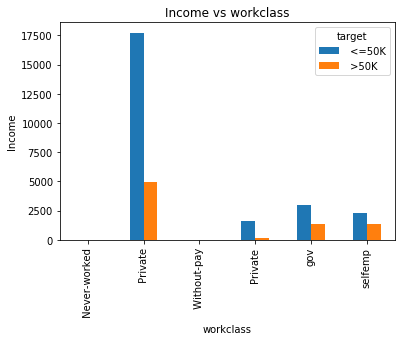

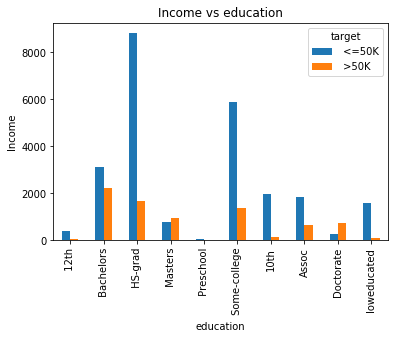

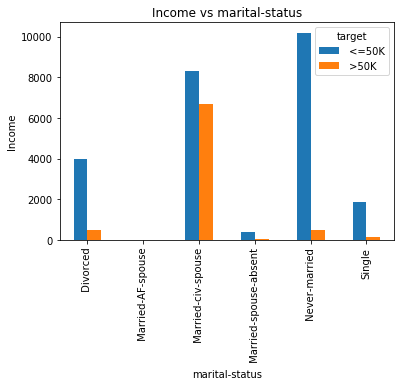

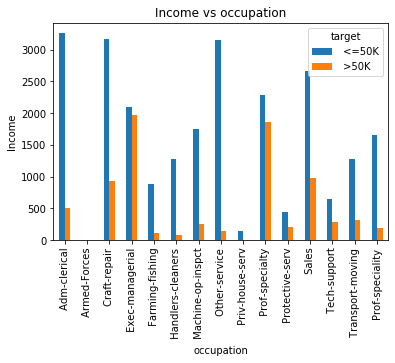

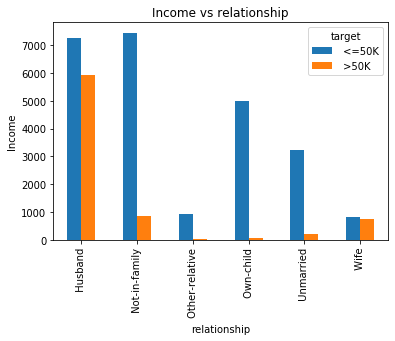

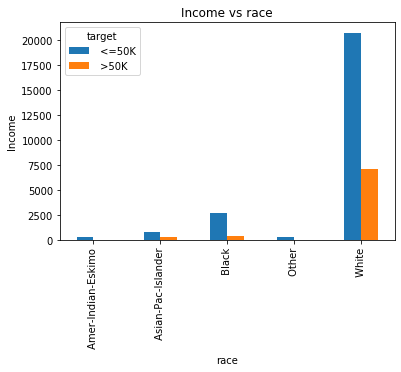

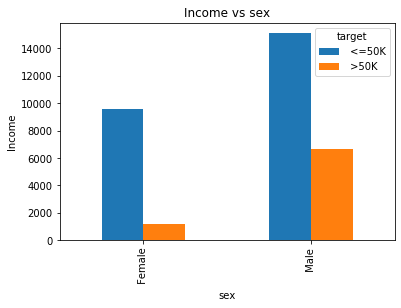

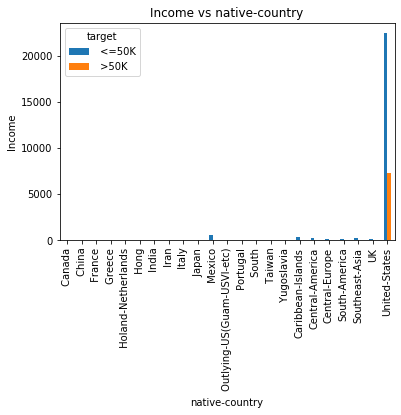

In [100]:
visualize_bivariate_graphs()

In [101]:
# Find the mean of the numeric variables wrt the target
adult.groupby('target').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
target,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


The income is higher than 50k for avg age 44, avg capital gain 4006, avg capital loss 195, and avg hr/week 45

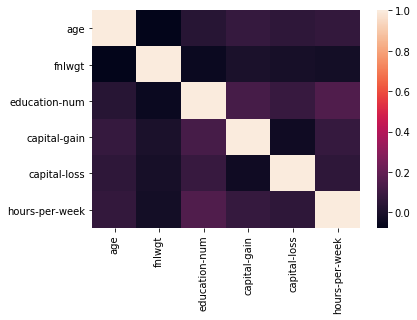

In [102]:
# Visualize correlation
import seaborn as sns
adult_corr=adult.corr()
sns.heatmap(adult_corr,xticklabels=adult_corr.columns, yticklabels=adult_corr.columns)

In [103]:
cat_columns=adult[['workclass','education','marital-status','occupation','relationship',
        'race','sex','native-country']]
cat_cols_one_hot=pd.get_dummies(cat_columns)

In [104]:
# delete the categoricals columns and add the new ones

adult.drop(columns=cat_columns, axis=1, inplace=True)
adult=pd.concat([adult,cat_cols_one_hot],axis=1)

In [105]:
adult

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_ Never-worked,workclass_ Private,workclass_ Without-pay,...,native-country_ South,native-country_ Taiwan,native-country_ Yugoslavia,native-country_Caribbean-Islands,native-country_Central-America,native-country_Central-Europe,native-country_South-America,native-country_Southeast-Asia,native-country_UK,native-country_United-States
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,28,338409,13,0,0,40,<=50K,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32557,40,154374,9,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,151910,9,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,1
32559,22,201490,9,0,0,20,<=50K,0,1,0,...,0,0,0,0,0,0,0,0,0,1


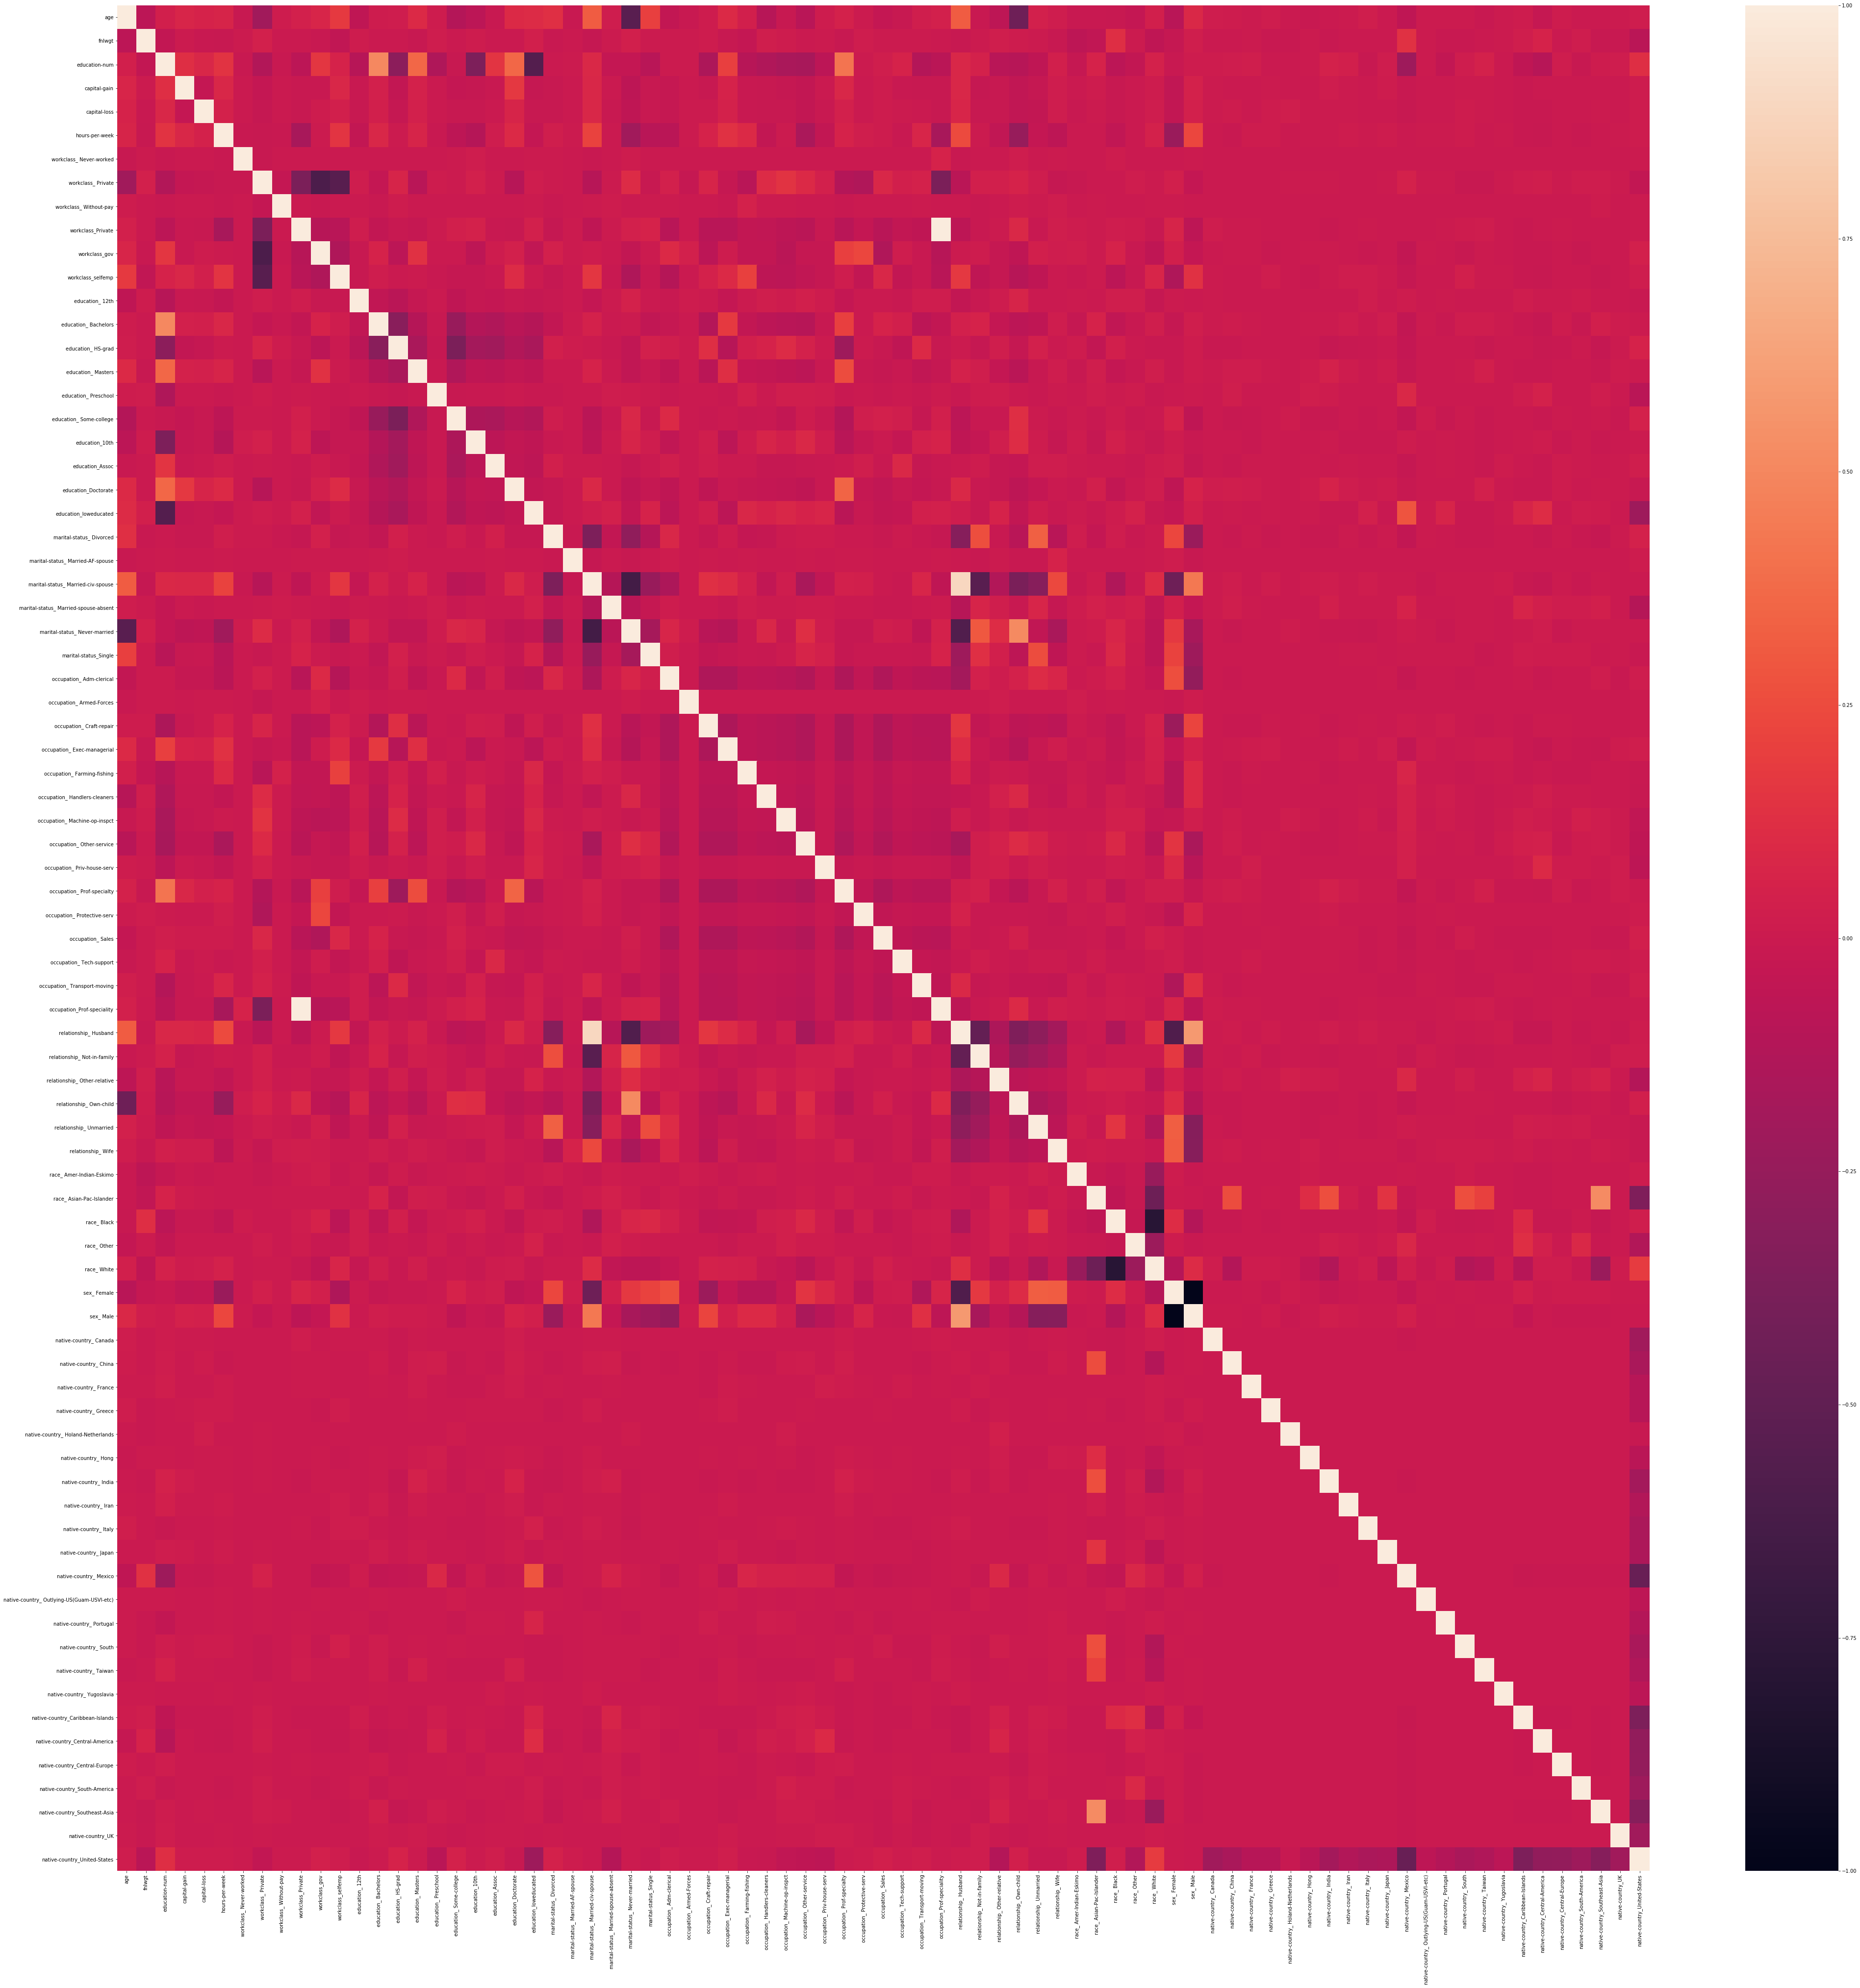

In [106]:
# Visualize correlation
import seaborn as sns
plt.figure(figsize=(70,70))
adult_corr=adult.corr()
sns.heatmap(adult_corr,xticklabels=adult_corr.columns, yticklabels=adult_corr.columns)

As you can see that, after one hot encoding, the correlation heatmap is not much interpretable graphically. So we will calculate the correlation numerically and remove the correlated columns

In [107]:
adult.shape

(32561, 80)

In [108]:
def remove_correlated_features(df, thres):
    y=df['target']
    df=df.drop(columns=['target'])
    adult_corr=adult.corr()
    corr_set=set()
    for i in range(len(adult_corr.columns)):
        for j in range(i):
            if (adult_corr.iloc[i,j]>thres and adult_corr.columns[j] not in corr_set):
                col_name=adult_corr.columns[i]
                corr_set.add(col_name)
                if col_name in df.columns:
                    df.drop(columns=col_name, axis=1, inplace=True)
    df['target']=y
    return df
                

In [111]:
adult=remove_correlated_features(adult,.6)

In [112]:
adult.shape

(32561, 78)